In [1]:
import pandas as pd
import numpy as np
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import warnings
from sklearn import metrics

In [2]:
data = pd.read_csv('Pt_nanoparticle_subset.csv', index_col=0)
data.head()

,N_total,N_bulk,N_surface,R_min,R_max,R_diff,R_avg,R_std,R_skew,R_kurt,...,q6q6_T8,q6q6_T9,q6q6_T10,q6q6_T11,q6q6_T12,Surf_defects_mol,Surf_micros_mol,Surf_facets_mol,Total_E,Formation_E
ID,,,,,,,,,,,,,,,,,,,,,
1,1732,1129,603,15.1180,18.9872,3.8692,17.2471,0.6262,-0.1372,0.1226,...,64,88,52,43,40,0.0000,121.5956,267.1222,-9237.3055,756.3345
2,1755,1150,605,15.3043,20.0506,4.7463,17.3469,0.6597,0.2938,0.3970,...,69,74,44,30,50,0.6383,117.4488,266.1747,-9335.3608,790.9892
3,4672,3456,1216,21.5357,27.5179,5.9822,24.5075,0.9193,-0.0729,0.1330,...,261,258,243,182,696,0.4796,84.8806,205.7275,-25287.5650,1669.8750
4,6823,5122,1701,23.3351,35.9820,12.6469,28.0471,1.9581,0.4768,0.2181,...,417,488,419,400,1730,0.6567,87.3462,189.9616,-37049.1710,2319.5390
5,10733,8349,2384,25.7149,40.8339,15.1190,32.7271,2.1220,-0.3342,0.2877,...,683,782,685,713,4006,0.6262,83.9156,163.6563,-58602.2500,3327.1600


In [3]:
X = data.iloc[:,:-5]
y = data.iloc[:,-1]
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = pd.DataFrame(min_max_scaler.fit_transform(X.values),columns=X.columns)
X_scaled.head()

,N_total,N_bulk,N_surface,R_min,R_max,R_diff,R_avg,R_std,R_skew,R_kurt,...,q6q6_T3,q6q6_T4,q6q6_T5,q6q6_T6,q6q6_T7,q6q6_T8,q6q6_T9,q6q6_T10,q6q6_T11,q6q6_T12
0,0.099987,0.082954,0.159792,0.384908,0.183569,0.046382,0.323010,0.016219,0.529445,0.089511,...,0.422857,0.376771,0.252465,0.134104,0.065704,0.032016,0.030705,0.052632,0.033541,0.003384
1,0.101455,0.084574,0.160442,0.390694,0.203226,0.069190,0.326296,0.020016,0.631094,0.105145,...,0.405714,0.427762,0.222880,0.128324,0.075090,0.034517,0.025820,0.044534,0.023401,0.004230
2,0.287583,0.262520,0.358883,0.584235,0.341265,0.101329,0.562090,0.049439,0.544610,0.090103,...,0.897143,0.827195,0.546351,0.301734,0.204332,0.130565,0.090021,0.245951,0.141966,0.058883
3,0.424834,0.391080,0.516401,0.640123,0.497730,0.274641,0.678646,0.167177,0.674253,0.094952,...,1.000000,1.000000,0.690335,0.517919,0.358845,0.208604,0.170272,0.424089,0.312012,0.146362
4,0.674324,0.640096,0.738227,0.714037,0.587421,0.338927,0.832755,0.185753,0.482984,0.098917,...,0.937143,0.963173,0.863905,0.590751,0.519134,0.341671,0.272854,0.693320,0.556162,0.338917


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,train_size=0.8)

In [17]:
# Create a Random Forest Regressor
rf_reg = RandomForestRegressor()
hps = dict(n_estimators=[50,100,150,200,250],min_samples_split=[2,3,4],min_samples_leaf=[1,2,3],max_features=["auto","sqrt","log2"])
reg = GridSearchCV(rf_reg, hps)
# Train the model using the training sets 
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)

# Model Evaluation
print(reg.best_params_)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

# Predicting Test data with the model
y_test_pred = reg.predict(X_test)
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 250}
R^2: 0.9995999237748233
Adjusted R^2: 0.9995792720668436
MAE: 14.875271849944662
MSE: 605.4816099816152
RMSE: 24.606535919987095
R^2: 0.9964891582581149
Adjusted R^2: 0.9956283268694797
MAE: 39.577808196539095
MSE: 5722.444643005123
RMSE: 75.64684159305743


In [11]:
# Create a Random Forest Regressor
rf_reg = RandomForestRegressor()
hps = dict(n_estimators=[50,100,150,200,250],min_samples_split=[2,3,4],min_samples_leaf=[1,2,3],max_features=["auto","sqrt","log2"])
reg = RandomizedSearchCV(rf_reg, hps, random_state=0, n_iter=50)
# Train the model using the training sets 
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)

# Model Evaluation
print(reg.best_params_)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

# Predicting Test data with the model
y_test_pred = reg.predict(X_test)
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

{'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
R^2: 0.9994381270331288
Adjusted R^2: 0.9994091234690494
MAE: 17.616227888395684
MSE: 850.3473267777945
RMSE: 29.160715470951573
R^2: 0.9963067235082497
Adjusted R^2: 0.9954011605222917
MAE: 40.8611543881548
MSE: 6019.801469036199
RMSE: 77.58737957320248


In [16]:
from sklearn.model_selection import SequenceSearchCV
# Create a Random Forest Regressor
rf_reg = RandomForestRegressor()
hps = dict(n_estimators=[50,100,150,200,250],min_samples_split=[2,3,4],min_samples_leaf=[1,2,3],max_features=["auto","sqrt","log2"])
reg = SequenceSearchCV(rf_reg, hps, random_state=0, n_iter=50)
# Train the model using the training sets 
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)

# Model Evaluation
print(reg.best_params_)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

# Predicting Test data with the model
y_test_pred = reg.predict(X_test)
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

{'n_estimators': 150, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
R^2: 0.9995755252614177
Adjusted R^2: 0.9995536141160051
MAE: 15.517701449071994
MSE: 642.4067013725601
RMSE: 25.34574325942248
R^2: 0.9961275560694471
Adjusted R^2: 0.9951780626057058
MAE: 41.09259319777485
MSE: 6311.832789657864
RMSE: 79.44704393278496


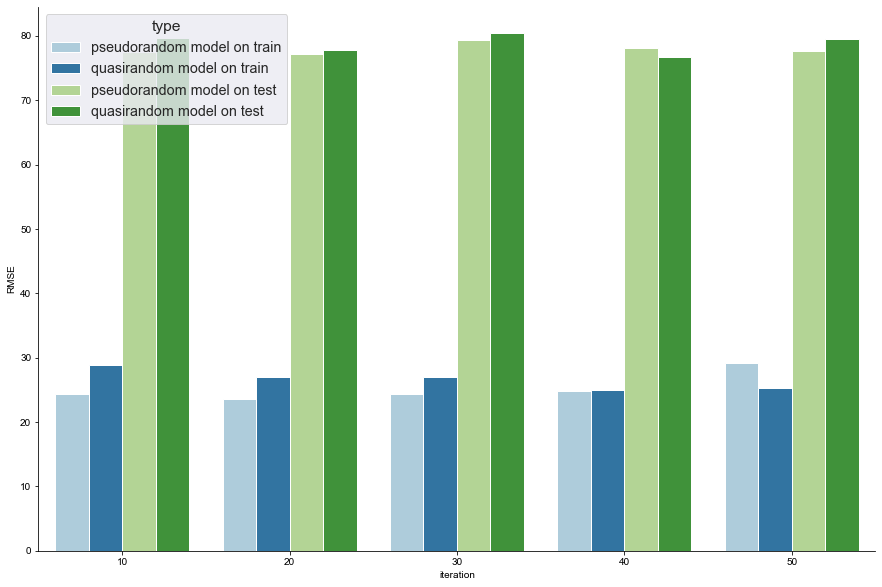

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame({
    'iteration': ['10','20','30','40','50'],
    'pseudorandom model on train': [24.4171,23.6642,24.3716,24.8761,29.1607],
    'quasirandom model on train': [28.9174,27.0354,26.9696,24.9575,25.3457],
    'pseudorandom model on test': [77.4269,77.2065,79.3813,78.1479,77.5874],
    'quasirandom model on test': [79.6632,77.8184,80.4425,76.7401,79.4470]
})
fig, ax1 = plt.subplots(figsize=(15, 10))
tidy = df.melt(id_vars='iteration').rename(columns=str.title)
tidy.columns = ['iteration', 'type', 'RMSE']
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 1.3)
sns.set_palette(sns.color_palette("Paired"))
sns.barplot(x='iteration', y='RMSE', hue='type', data=tidy, ax=ax1)
sns.despine(fig)
plt.savefig('hp_opt_all_list.png',bbox_inches='tight')